# Instacart Grocery Basket Analysis: Part 1

# Table of Contents
## Importing Libraries & Dataset
#### Importing Libraries
#### Importing Data
## Identifying any Personally Identifiable Information (PII)
#### Dropping columns with PII
#### Exporting the new dataset
## Regional Segmentation
#### Creation of a new column 'region'
#### Graph to display the share of different regions 
#### Crosstab & Bar graph between regions and spending 
## Exclusion flag for low-activity customers (Orders < 5)
#### Creation of a new column 'activity_flag'
#### Creation of a new subset with only high activity customers
#### Exporting the new dataframe

# Importing libraries & dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing data

path = '/Users/tannu/Desktop/Data Analytics/Instacart Basket Analysis Dec-2025 '
df = pd.read_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods.parquet'))

In [3]:
# checking for number of rows

df.shape

(32404859, 31)

In [4]:
# checking for columns 

df.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_range,busiest_day,busiest_hours,max_order,loyalty_flag,average_spent,spending_flag,order_frequency,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both


# Identifying any Personally Identifiable Information (PII)

In [4]:
# checking for column names to identify which columns may have PII

df.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_the_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range', 'busiest_day', 'busiest_hours', 'max_order',
       'loyalty_flag', 'average_spent', 'spending_flag', 'order_frequency',
       'order_frequency_flag', '_merge'],
      dtype='object')

#### We should drop first_name & surname to follow data privacy & ethics rules.

In [5]:
# checking for data type for both the variables

df[['first_name', 'surname']].dtypes

first_name    object
surname       object
dtype: object

In [3]:
# dropping columns 'first_name' & 'last_name'

df = df.drop(columns = ['first_name', 'surname'])

In [7]:
# checking for shape of the dataframe after dropping the columns

df.shape

(32404859, 29)

In [8]:
# exporting this new datframe

df.to_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods_no_pii.parquet'))

# Regional Segmentation 

In [9]:
# checking the state column values and their frequency

df['state'].value_counts(dropna = False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [4]:
# assigning states to regions

region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
           'New Jersey']
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 
           'Iowa', 'Missouri']
region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
           'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
           'California', 'Hawaii']

In [5]:
# creating a new column 'region' & assigning region values based on values in the 'state' column

df.loc[df['state'].isin(region1), 'region'] = 'Northeast'
df.loc[df['state'].isin(region2), 'region'] = 'Midwest'
df.loc[df['state'].isin(region3), 'region'] = 'South'
df.loc[df['state'].isin(region4), 'region'] = 'West'

In [6]:
# checking for creation of this column and its frequency 

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage Share of Different Regions')

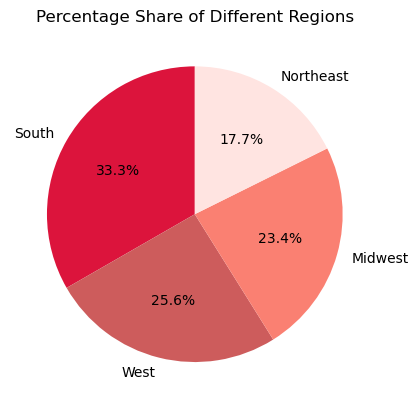

In [10]:
# plotting a chart to display region-wise share in the Instacart app

pie = df['region'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, colors = ['crimson', 'indianred', 'salmon', 'mistyrose'])
plt.ylabel('')
plt.title('Percentage Share of Different Regions')

In [11]:
# exporting the pie chart

pie.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'pie_region.png'))

In [13]:
# checking the shape of the dataframe after creation of a new column

df.shape

(32404859, 30)

In [14]:
# Comparing the region-wise spending 

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
crosstab.to_clipboard()

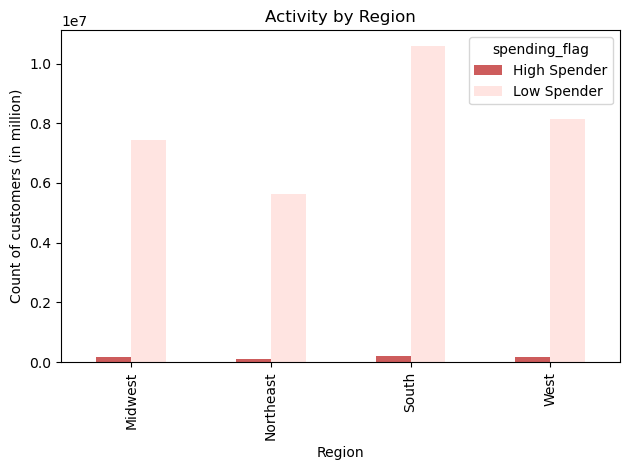

In [28]:
# plotting a bar chart to visualize the results of the crosstab we created between 'region' & 'spending_flag'

bar = crosstab.plot(kind='bar', color=['indianred','mistyrose'])
plt.xlabel("Region")
plt.ylabel("Count of customers (in million)")
plt.title("Activity by Region")
plt.tight_layout()

In [29]:
# exporting the graph

bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'activity_by_region.png'))

#### The biggest market for Instacart is the South, and the smallest market is the Northeast.

# Exclusion flag for low-activity customers (Orders < 5)

In [18]:
# creating a new column 'activity_flag' to flag customers with max_order less than 5

df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [19]:
# checking the creation of the column

df['activity_flag'].value_counts(dropna = False)

activity_flag
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [22]:
# checking for shape of the dataframe after adding the column 'activity_flag'

df.shape

(32404859, 31)

#### There re 1440295 customers who have low activity on the instacart app.

In [20]:
# creating and saving the subset with only high activity customers

df_high = df[df['activity_flag'] == ('High activity')] 

In [23]:
# checking the shape of the dataframe 'df_high' before exporting

df_high.shape

(30964564, 31)

In [30]:
# checking if the new dataframe is correct

df_high['activity_flag'].value_counts(dropna = False)

activity_flag
High activity    30964564
Name: count, dtype: int64

In [24]:
# exporting df_high dataframe

df_high.to_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods_high_activity.parquet'))